In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import functions 

import pandas as pd
import seaborn as sns
from matplotlib import cm

sns.set_style("whitegrid")

plt.rcParams.update({'font.size': 14})
cmap = cm.get_cmap('tab20c')
y1_color = cmap(1/20) #bleu 
y2_color = cmap(6/20) #orange
y3_color = cmap(9/20) #vert
y4_color = cmap(14/20) #violet
#palette = ["cornflowerblue",y2_color,"lightpink"] 
palette = [y1_color,y2_color,y3_color,y4_color]

/var/folders/wb/j_66l1b92d580qv2dsc3kpmr0000gp/T/ipykernel_8496/973204613.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


In [3]:
################################################################################################
############ Coverage 
################################################################################################

def plot_resultats_(resultats,alpha):
    ################################################
    ############ WSC-Coverage
    sns.set_style("whitegrid") 
    plt.figure(figsize=(4,6))
    g = sns.boxplot( 
        data=resultats,
        x="Method", y="WSC-Coverage", palette=[y1_color,y2_color,y3_color,y4_color],linewidth=2.5,order=["IP","MS","APS","OTCP"],hue ="Method", legend=False
    )  
    sns.despine(trim=True, left=True)
    plt.ylabel("WSC-Coverage") 
    plt.hlines(alpha,xmin=-0.5,xmax=3.5,linewidth=2,linestyles="dashed",color="black") 

    ################################################
    ############ Coverage
    plt.figure(figsize=(4,6))
    g = sns.boxplot( 
        data=resultats,
        x="Method", y="Coverage", palette=[y1_color,y2_color,y3_color,y4_color],linewidth=2.5,order=["IP","MS","APS","OTCP"],hue ="Method", legend=False
    )   
    plt.ylabel("Coverage") 
    sns.despine(trim=True, left=True)
    plt.hlines(alpha,xmin=-0.5,xmax=3.5,linewidth=2,linestyles="dashed",color="black") 


    ################################################
    ############ Efficiency
    plt.figure(figsize=(4,6))
    g = sns.boxplot( 
        data=resultats,
        x="Method", y="Efficiency", palette=[y1_color,y2_color,y3_color,y4_color],linewidth=2.5,order=["IP","MS","APS","OTCP"],hue ="Method", legend=False
    )   
    plt.ylabel("Size") 
    sns.despine(trim=True, left=True)

    ################################################
    ############ Informativeness 
    plt.figure(figsize=(4,6))
    g = sns.boxplot( 
        data=resultats,
        x="Method", y="Informativeness", palette=[y1_color,y2_color,y3_color,y4_color],linewidth=2.5,order=["IP","MS","APS","OTCP"],hue ="Method", legend=False
    )   
    plt.ylabel("Informativeness") 
    sns.despine(trim=True, left=True)

################################################################################################
############ Conditional coverage (wrt label)
################################################################################################
def plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset):
    plt.figure()
    g =sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Coverage", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
    plt.ylabel("Coverage") 
    plt.ylim(0.5,1)
    plt.savefig("Figures/Classif{}_cond_to_y_Coverage.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ################################################
    ################################################
    #plt.figure()
    #sns.catplot( 
    #    data=resultats_condit_to_y,  kind="bar",
    #    x="Label", y="WSC-Coverage", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    #)   
    #plt.ylabel("WSC-Coverage") 
    #plt.hlines(alpha,xmin=-0.5,xmax=nb_-0.5,linewidth=2,linestyles="dashed",color="black") 
    #plt.savefig("Figures/Classif{}_cond_to_y_WSC-Coverage.pdf".format(dataset), format="pdf",bbox_inches="tight")
    #plt.show()
    ################################################
    ################################################
    plt.figure()
    sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Efficiency", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    plt.ylabel("Size") 
    plt.savefig("Figures/Classif{}_cond_to_y_Efficiency.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ################################################
    ################################################
    plt.figure()
    sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Informativeness", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    plt.ylabel("Informativeness") 
    plt.savefig("Figures/Classif{}_cond_to_y_Informativeness.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    


In [6]:
from keras.datasets import mnist,fashion_mnist
from sklearn.ensemble import RandomForestClassifier

# MNIST

(29404, 28, 28)


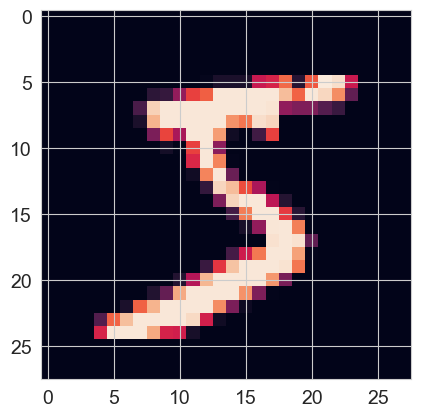

In [ ]:
dataset = "mnistK5" # to save figures 
(images, labels), (test_X, test_y) = mnist.load_data()
# for fashion mnist : 5 labels for main text are [0,2,4,6,9]

to_keep = [5,6,7,8,9]
images = np.concatenate([images[labels==i] for i in to_keep])
labels = np.concatenate([np.repeat(j,len(labels[labels==i])) for j,i in enumerate(to_keep)]) # keep labels and rename them between 0 and K 

print(images.shape)
plt.imshow(images[labels==0][0])

In [8]:
np.random.seed(62) 

#### REPEAT EXPERIMENTS 
alpha = 0.9 
clf = RandomForestClassifier() 

N = 10
resultats = []
resultats_condit_to_y = []
for rep in range(N):
    print(rep)
    n = 20000  # Number of data samples 
    indices = np.random.choice(len(images),n)
    X, Y = images[indices].reshape(n,images.shape[1]*images.shape[2]), labels[indices]
    K = len(np.unique(Y))
    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.9)
    y_test, y_cal = y_test.flatten(), y_cal.flatten()

    # LEARN CLASSIFIER AND GET SCORES FOR CALIBRATION DATA 
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    # APPLY ALL METHODS 
    calib_parameters = functions.CalibAllMetrics(X_cal,y_cal,clf, alpha,K)
    res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test,y_test,clf,calib_parameters,K)
    
    resultats.append( np.array(res_OTCP).tolist()+["OTCP"] )
    resultats.append( np.array(res_IP).tolist()+["IP"] )
    resultats.append( np.array(res_MS).tolist()+["MS"] )
    resultats.append( np.array(res_APS).tolist()+["APS"] )
    K = len(np.unique(y_test))
    for y in range(K):
        X_test_y = X_test[y_test==y]
        y_test_y = y_test[y_test==y]
        res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test_y,y_test_y,clf,calib_parameters,K)
        resultats_condit_to_y.append( np.array(res_OTCP).tolist()+["OTCP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_IP).tolist()+["IP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_MS).tolist()+["MS"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_APS).tolist()+["APS"]+["{}".format(y)] )

resultats = pd.DataFrame(resultats,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method"]) 
resultats_condit_to_y = pd.DataFrame(resultats_condit_to_y,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method","Label"])


0
0.94


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


1
0.9566666666666667


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


2
0.9494444444444444


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


3
0.9411111111111111


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


4
0.9555555555555556


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


5
0.9538888888888889


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


6
0.9516666666666667


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


7
0.9477777777777778


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


8
0.9577777777777777


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


9
0.95


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


In [ ]:
# We save the results 
#resultats.to_csv('csv/classif_{}_resultats.csv'.format(dataset), index=False)

<Figure size 640x480 with 0 Axes>

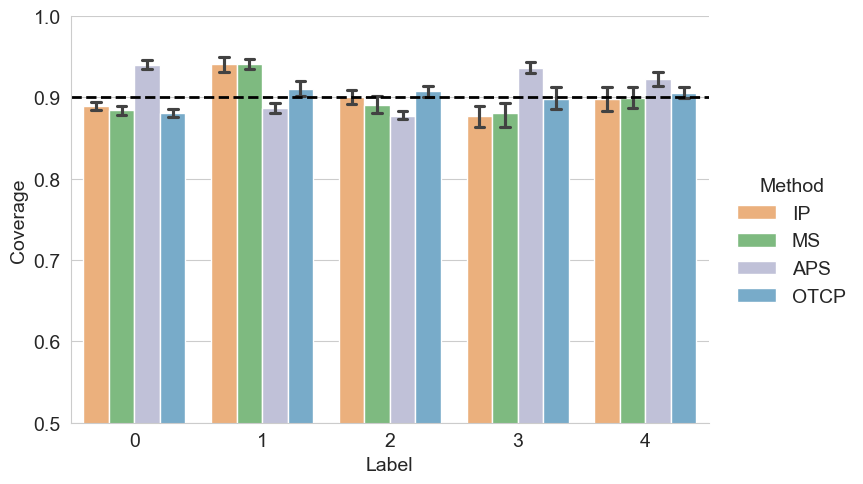

<Figure size 640x480 with 0 Axes>

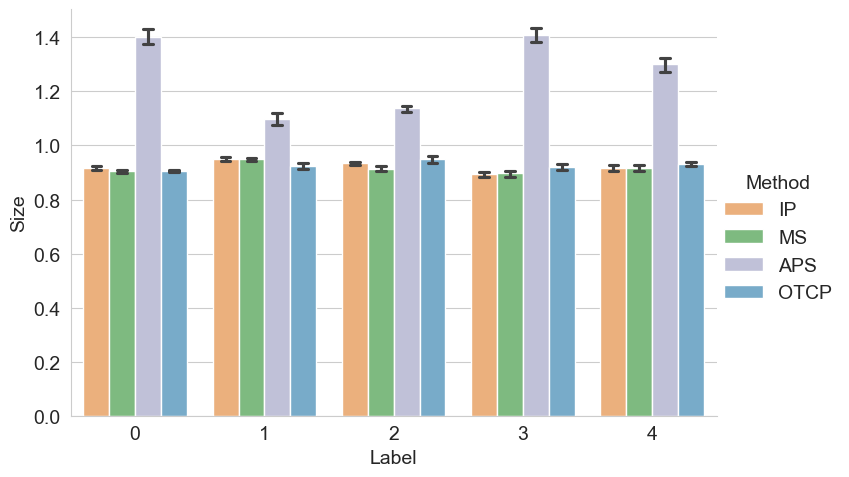

<Figure size 640x480 with 0 Axes>

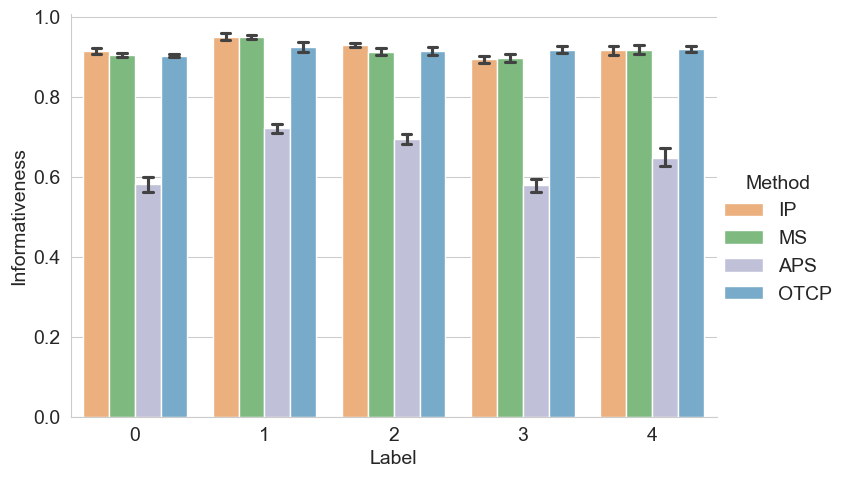

In [12]:
plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset)  

# Fashion-MNIST

(30000, 28, 28)


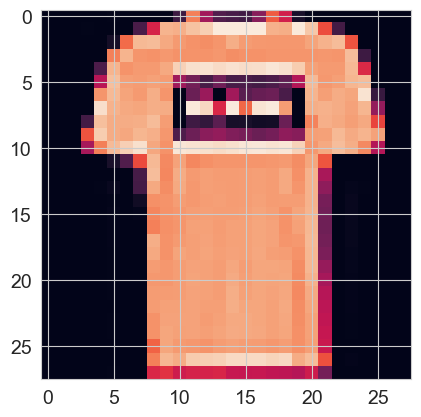

In [13]:
dataset = "fashionK5" # to save figures 
(images, labels), (test_X, test_y) = fashion_mnist.load_data()

to_keep = [0,2,4,6,9]
images = np.concatenate([images[labels==i] for i in to_keep])
labels = np.concatenate([np.repeat(j,len(labels[labels==i])) for j,i in enumerate(to_keep)]) # keep labels and rename them between 0 and K 

print(images.shape)
plt.imshow(images[labels==0][0])

In [14]:
np.random.seed(62) 

#### REPEAT EXPERIMENTS 
alpha = 0.9 
clf = RandomForestClassifier() 

N = 10
resultats = []
resultats_condit_to_y = []
for rep in range(N):
    print(rep)
    n = 20000  # Number of data samples 
    indices = np.random.choice(len(images),n)
    X, Y = images[indices].reshape(n,images.shape[1]*images.shape[2]), labels[indices]
    K = len(np.unique(Y))
    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.9)
    y_test, y_cal = y_test.flatten(), y_cal.flatten()

    # LEARN CLASSIFIER AND GET SCORES FOR CALIBRATION DATA 
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    # APPLY ALL METHODS 
    calib_parameters = functions.CalibAllMetrics(X_cal,y_cal,clf, alpha,K)
    res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test,y_test,clf,calib_parameters,K)
    
    resultats.append( np.array(res_OTCP).tolist()+["OTCP"] )
    resultats.append( np.array(res_IP).tolist()+["IP"] )
    resultats.append( np.array(res_MS).tolist()+["MS"] )
    resultats.append( np.array(res_APS).tolist()+["APS"] )
    K = len(np.unique(y_test))
    for y in range(K):
        X_test_y = X_test[y_test==y]
        y_test_y = y_test[y_test==y]
        res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test_y,y_test_y,clf,calib_parameters,K)
        resultats_condit_to_y.append( np.array(res_OTCP).tolist()+["OTCP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_IP).tolist()+["IP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_MS).tolist()+["MS"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_APS).tolist()+["APS"]+["{}".format(y)] )

resultats = pd.DataFrame(resultats,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method"]) 
resultats_condit_to_y = pd.DataFrame(resultats_condit_to_y,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method","Label"])


0
0.8072222222222222


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


1
0.7988888888888889


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


2
0.8127777777777778


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


3
0.8155555555555556


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


4
0.8127777777777778


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


5
0.8033333333333333


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


6
0.8244444444444444


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


7
0.8188888888888889


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


8
0.7955555555555556


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


9
0.8188888888888889


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


<Figure size 640x480 with 0 Axes>

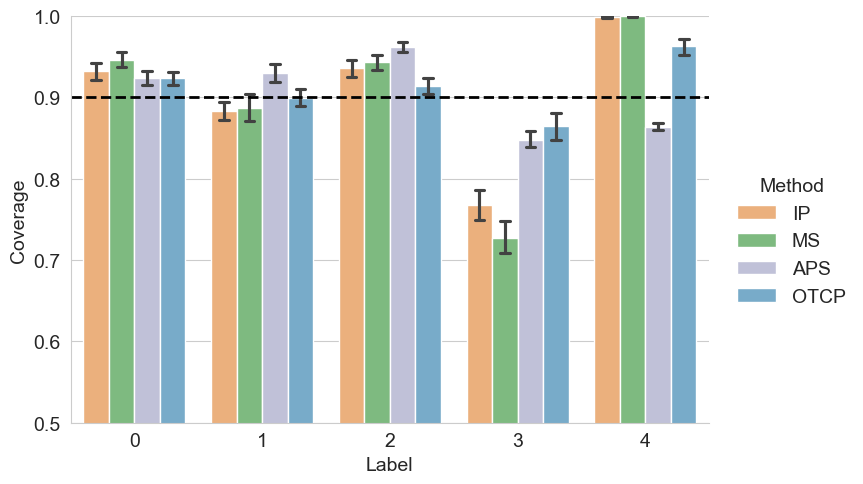

<Figure size 640x480 with 0 Axes>

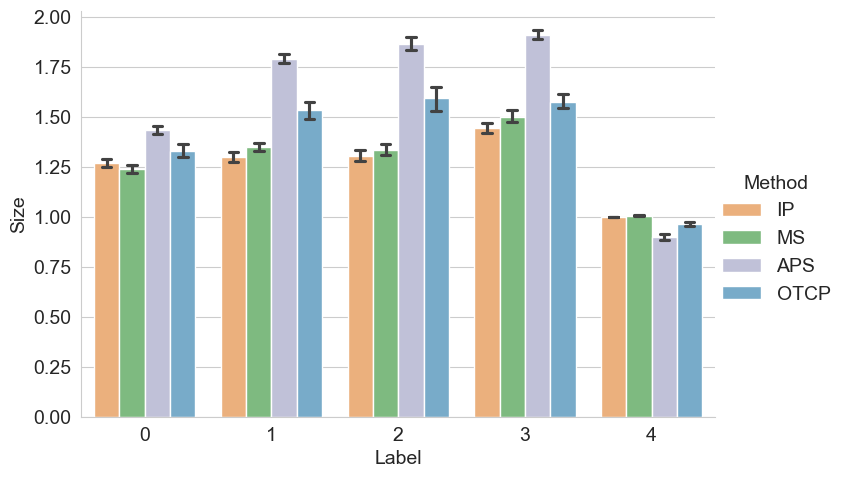

<Figure size 640x480 with 0 Axes>

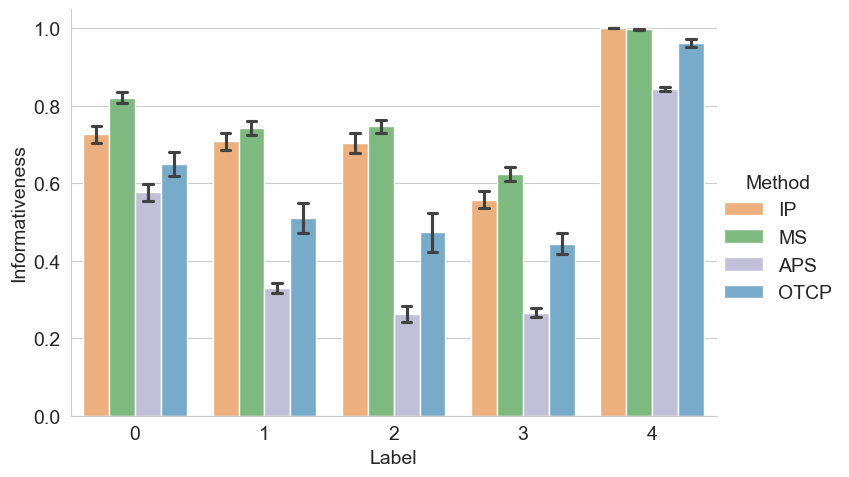

In [16]:
plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset)  

In [17]:
# We save the results 
resultats.to_csv('csv/classif_{}_resultats.csv'.format(dataset), index=False)

# CIFAR-10

(25000, 32, 32, 3)


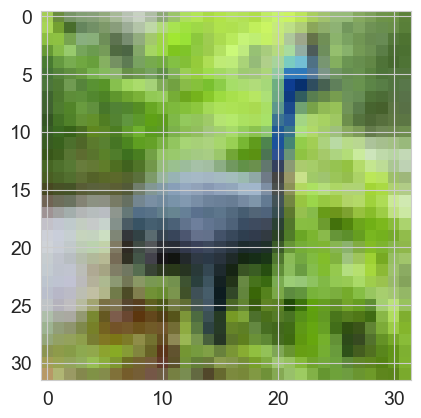

In [4]:
from keras.datasets import cifar10
from tensorflow.keras import layers, models

dataset = "CIFAR_K5"
(images, labels), (test_X, test_y) = cifar10.load_data() 

images = images / 255.0
labels = labels.flatten()

to_keep =  [2,4,5,6,7] 
images = np.concatenate([images[labels==i] for i in to_keep])
labels = np.concatenate([np.repeat(j,len(labels[labels==i])) for j,i in enumerate(to_keep)]) # keep labels and rename them between 0 and K 

print(images.shape)
plt.imshow(images[labels==0][0])

###### ANN
clf = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(len(to_keep), activation='softmax')    
    ])

clf.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [5]:
np.random.seed(62) 

#### REPEAT EXPERIMENTS 
alpha = 0.9 

N = 10
resultats = []
resultats_condit_to_y = []
for rep in range(N):
    print(rep)
    n = 20000  # Number of data samples 
    indices = np.random.choice(len(images),n)
    X, Y = images[indices], labels[indices]
    K = len(np.unique(Y))
    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.9)
    y_test, y_cal = y_test.flatten(), y_cal.flatten()

    # LEARN CLASSIFIER AND GET SCORES FOR CALIBRATION DATA 
    clf.fit(X_train, y_train,epochs=5)

    # APPLY ALL METHODS 
    calib_parameters = functions.CalibAllMetrics(X_cal,y_cal,clf, alpha,K)
    res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test,y_test,clf,calib_parameters,K)
    
    resultats.append( np.array(res_OTCP).tolist()+["OTCP"] )
    resultats.append( np.array(res_IP).tolist()+["IP"] )
    resultats.append( np.array(res_MS).tolist()+["MS"] )
    resultats.append( np.array(res_APS).tolist()+["APS"] )
    K = len(np.unique(y_test))
    for y in range(K):
        X_test_y = X_test[y_test==y]
        y_test_y = y_test[y_test==y]
        res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test_y,y_test_y,clf,calib_parameters,K)
        resultats_condit_to_y.append( np.array(res_OTCP).tolist()+["OTCP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_IP).tolist()+["IP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_MS).tolist()+["MS"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_APS).tolist()+["APS"]+["{}".format(y)] )

resultats = pd.DataFrame(resultats,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method"]) 
resultats_condit_to_y = pd.DataFrame(resultats_condit_to_y,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method","Label"])


0
Epoch 1/5
63/63 [==============================] - 1s 18ms/step - loss: 1.6040 - accuracy: 0.2830
Epoch 2/5
63/63 [==============================] - 2s 32ms/step - loss: 1.4894 - accuracy: 0.3605
Epoch 3/5
63/63 [==============================] - 2s 25ms/step - loss: 1.4335 - accuracy: 0.3955
Epoch 4/5
63/63 [==============================] - 2s 28ms/step - loss: 1.3768 - accuracy: 0.4240
Epoch 5/5
507/507 [==============================] - 5s 10ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


12/12 [==============================] - 0s 11ms/step
1
Epoch 1/5
63/63 [==============================] - 1s 21ms/step - loss: 1.4183 - accuracy: 0.4110
Epoch 2/5
63/63 [==============================] - 1s 22ms/step - loss: 1.3589 - accuracy: 0.4445
Epoch 3/5
63/63 [==============================] - 1s 24ms/step - loss: 1.3185 - accuracy: 0.4670
Epoch 4/5
63/63 [==============================] - 2s 24ms/step - loss: 1.2931 - accuracy: 0.4650
Epoch 5/5
507/507 [==============================] - 4s 8ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


12/12 [==============================] - 0s 13ms/step
2
Epoch 1/5
63/63 [==============================] - 1s 22ms/step - loss: 1.3609 - accuracy: 0.4200
Epoch 2/5
63/63 [==============================] - 2s 24ms/step - loss: 1.3151 - accuracy: 0.4675
Epoch 3/5
63/63 [==============================] - 2s 26ms/step - loss: 1.2847 - accuracy: 0.4780
Epoch 4/5
63/63 [==============================] - 2s 25ms/step - loss: 1.2571 - accuracy: 0.4930
Epoch 5/5
507/507 [==============================] - 5s 9ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


11/11 [==============================] - 0s 11ms/step
3
Epoch 1/5
63/63 [==============================] - 1s 21ms/step - loss: 1.2909 - accuracy: 0.4600
Epoch 2/5
63/63 [==============================] - 1s 22ms/step - loss: 1.2596 - accuracy: 0.4900
Epoch 3/5
63/63 [==============================] - 1s 21ms/step - loss: 1.2137 - accuracy: 0.5105
Epoch 4/5
63/63 [==============================] - 1s 21ms/step - loss: 1.1756 - accuracy: 0.5365
Epoch 5/5
507/507 [==============================] - 4s 9ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


11/11 [==============================] - 0s 13ms/step
4
Epoch 1/5
63/63 [==============================] - 1s 17ms/step - loss: 1.2848 - accuracy: 0.4840
Epoch 2/5
63/63 [==============================] - 1s 21ms/step - loss: 1.2293 - accuracy: 0.5090
Epoch 3/5
63/63 [==============================] - 1s 21ms/step - loss: 1.2055 - accuracy: 0.5255
Epoch 4/5
63/63 [==============================] - 1s 21ms/step - loss: 1.1746 - accuracy: 0.5445
Epoch 5/5
507/507 [==============================] - 4s 8ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


12/12 [==============================] - 0s 12ms/step
5
Epoch 1/5
63/63 [==============================] - 1s 20ms/step - loss: 1.2453 - accuracy: 0.5025
Epoch 2/5
63/63 [==============================] - 1s 23ms/step - loss: 1.1966 - accuracy: 0.5335
Epoch 3/5
63/63 [==============================] - 1s 23ms/step - loss: 1.1727 - accuracy: 0.5430
Epoch 4/5
63/63 [==============================] - 2s 24ms/step - loss: 1.1351 - accuracy: 0.5500
Epoch 5/5
507/507 [==============================] - 4s 8ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


11/11 [==============================] - 0s 15ms/step
6
Epoch 1/5
63/63 [==============================] - 1s 21ms/step - loss: 1.2400 - accuracy: 0.4965
Epoch 2/5
63/63 [==============================] - 2s 24ms/step - loss: 1.1866 - accuracy: 0.5340
Epoch 3/5
63/63 [==============================] - 1s 22ms/step - loss: 1.1600 - accuracy: 0.5370
Epoch 4/5
63/63 [==============================] - 1s 21ms/step - loss: 1.1459 - accuracy: 0.5455
Epoch 5/5
507/507 [==============================] - 4s 8ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


12/12 [==============================] - 0s 13ms/step
7
Epoch 1/5
63/63 [==============================] - 1s 19ms/step - loss: 1.2080 - accuracy: 0.5235
Epoch 2/5
63/63 [==============================] - 1s 23ms/step - loss: 1.1489 - accuracy: 0.5490
Epoch 3/5
63/63 [==============================] - 2s 25ms/step - loss: 1.1118 - accuracy: 0.5615
Epoch 4/5
63/63 [==============================] - 1s 22ms/step - loss: 1.1054 - accuracy: 0.5525
Epoch 5/5
507/507 [==============================] - 4s 7ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


13/13 [==============================] - 0s 11ms/step
8
Epoch 1/5
63/63 [==============================] - 2s 30ms/step - loss: 1.1916 - accuracy: 0.5215
Epoch 2/5
63/63 [==============================] - 2s 29ms/step - loss: 1.1199 - accuracy: 0.5575
Epoch 3/5
63/63 [==============================] - 2s 27ms/step - loss: 1.0973 - accuracy: 0.5635
Epoch 4/5
63/63 [==============================] - 2s 30ms/step - loss: 1.0652 - accuracy: 0.5915
Epoch 5/5
507/507 [==============================] - 6s 11ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


12/12 [==============================] - 0s 11ms/step
9
Epoch 1/5
63/63 [==============================] - 2s 26ms/step - loss: 1.1870 - accuracy: 0.5305
Epoch 2/5
63/63 [==============================] - 2s 28ms/step - loss: 1.1427 - accuracy: 0.5400
Epoch 3/5
63/63 [==============================] - 2s 32ms/step - loss: 1.1109 - accuracy: 0.5625
Epoch 4/5
63/63 [==============================] - 2s 31ms/step - loss: 1.0610 - accuracy: 0.5950
Epoch 5/5
507/507 [==============================] - 6s 11ms/step


/Users/glthurin/anaconda3/lib/python3.10/site-packages/ot/lp/__init__.py:512: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


12/12 [==============================] - 0s 12ms/step


<Figure size 640x480 with 0 Axes>

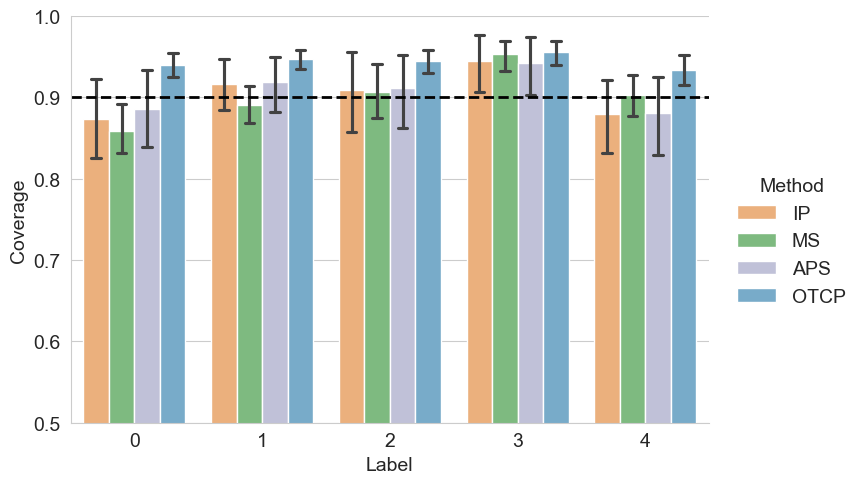

<Figure size 640x480 with 0 Axes>

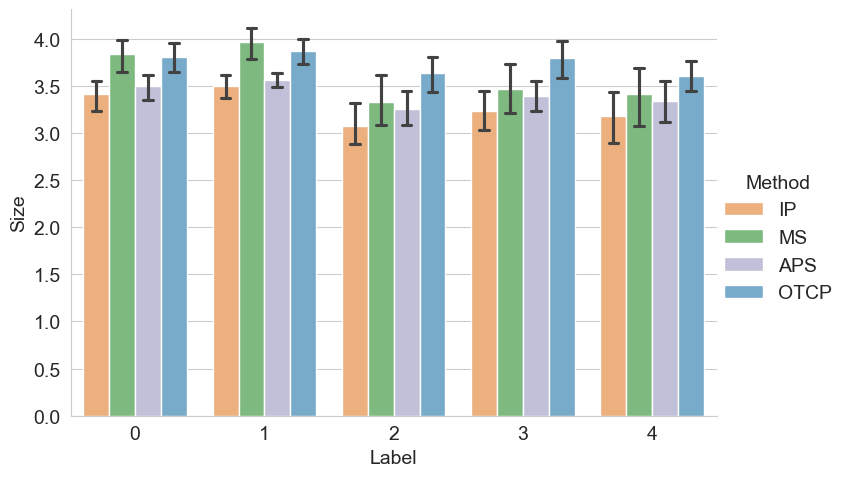

<Figure size 640x480 with 0 Axes>

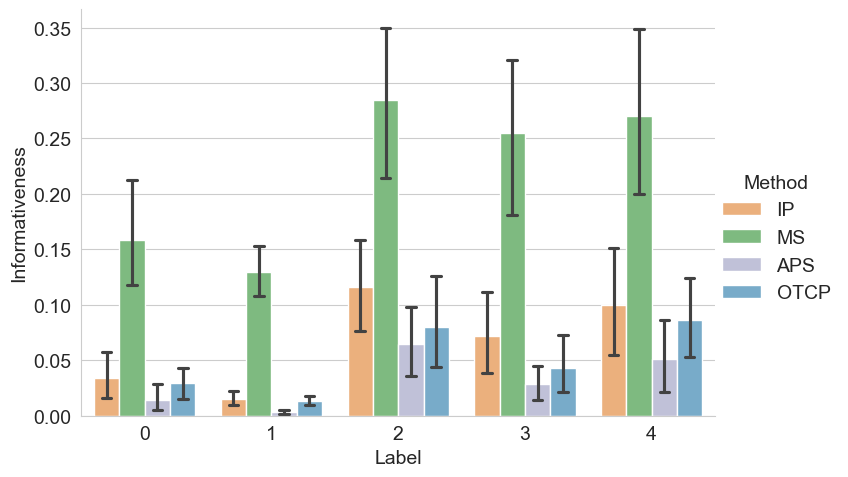

In [7]:
plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset)  